# Практическая работа №2: Классические методы математической статистики
Выполнил студент гр.1375 Кондрашин Дмитрий. Вариант 13


## Цель работы
Научится применять методы математической статистики для решения задач статистического анализа; сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Основные теоретические положения

**Выборочный аналог математического ожидания - выборочное среднее:**
$$\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i$$

**Выборочный аналог дисперсии и СКО - выборочную дисперсию и выборочное СКО:**
$$S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)$$

$$S=\sqrt{S^2}$$



**Выборочный коэффициент асимметрии:**
$$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3}$$

**Выборочный коэффициент эксцесса:**
$$\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3$$

**Метод максимального правдоподобия** - это метод оценивания неизвестного параметра путём максимизации функции правдоподобия
 $$L(\overrightarrow{X},\theta)=\prod_{i=1}^{n}P_{\theta}(X_{i})$$

**Метод моментов** — метод оценки неизвестных параметров распределений, идея метода заключается в замене истинных соотношений выборочными аналогами.

**Статистика критерия Колмагорова:**
$$D_n = sup_{x \in \mathbb{R}}|F_n(x) - F_0(x)|$$


**Наиболее мощный критерий:**

$$ \phi(x) =\left\{
  \begin{array}{l}
    1, LR(x) > с \\
    p, LR(x) = с \\
    0, LR(x) < с \\
  \end{array}\right.$$

  **Теорема Колмогорова**

$D_{n}(\overrightarrow{X}) = \overset{}{\underset{X \in \mathbb R}{sup}} |F_{0}(X_{i}) - F_{n}(X_{i})|$

Если гипотеза $H_{0}$ верна, и $F_{0}(X)$ - непрерывна на R, тогда $P(\sqrt{n} D_{n}(\overrightarrow{X}) < у) \xrightarrow[n \rightarrow \infty]{} K(у)$

где $K(у)=1-\alpha$ - функция распределения Колмогорова.

$D_{n} < у$ - гипотезу не отвергаем

 $D_{n} > y$ - гипотезу отвергаем

  **Асимптотический доверительный интервал (АДИ)**

**На базе Асимптотической нормальности оценки $\widehat{\theta}$**

- Асимптотическая нормальность $\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta)\right)\sim \mathcal{N}\left(0,\sigma^{2}(\theta)\right)$

- Тогда $\sqrt{n}\frac{\widehat{\theta}(\overrightarrow{X})-\theta}{\sigma\left(\widehat{\theta}(\overrightarrow{X})\right)}$    

- Выбираем $X_{\alpha}: \Phi(X_{\alpha})=1-\frac{\alpha}{2}$

- А.Д.И. $\left[ \widehat{\theta}(\overrightarrow{X})-\frac{X_{\alpha}\cdot \sigma\left( \widehat{\theta}(\overrightarrow{X}) \right)}{\sqrt{n}}; \widehat{\theta}(\overrightarrow{X})+\frac{X_{\alpha}\cdot \sigma\left( \widehat{\theta}(\overrightarrow{X}) \right)}{\sqrt{n}}\right]$

**на базе ОМП**

- Пусть $\widehat{\theta}(\overrightarrow{X})$-ОМП

- При выполнении опр.условий регулярности: $\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta)\right)\sim \mathcal{N}\left(0,\frac{1}{I(\theta)}\right), I(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \theta^{2}} \right)$-информация Фишера

- Тогда $\sqrt{n\cdot I\left( \widehat{\theta}(\overrightarrow{X}) \right)}\cdot \left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim \mathcal{N}(0,1)$

- Выбираем $X_{\alpha}: \Phi(X_{\alpha})=1-\frac{\alpha}{2}$

- А.Д.И $\left[ \widehat{\theta}(\overrightarrow{X})-\frac{X_{\alpha}}{\sqrt{n\cdot I\left( \widehat{\theta}(\overrightarrow{X}) \right)}};\widehat{\theta}(\overrightarrow{X})+\frac{X_{\alpha}}{\sqrt{n\cdot I\left( \widehat{\theta}(\overrightarrow{X}) \right)}} \right]$

## Постановка задачи
Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Задание-1

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as sp
from scipy.stats import expon, kstwobign,gamma
import statistics as stat
import math
import collections
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


row = [7,6, 3, 12, 1, 1, 8, 0, 8, 5, 0, 0, 4, 7, 11, 1, 21, 20, 4, 2,0, 2, 3, 1, 0, 2, 5, 6, 0, 4, 0, 5, 1, 3, 5, 0, 5, 19, 4, 5, 13, 1, 0, 0,
23, 17, 2, 3, 2, 5] #выборка

#### a)Построить вариционный ряд, эмпирическую функцию распределения и гистограмму частот

In [174]:
sortedRow = np.sort(row)
n = len(row)
print(sortedRow)
print("Среднее выборки = ",sum(row)/ len(row))
print("Сумма выборки = ",sum(sortedRow))
# Нанесение на график вариационного ряда


[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  2  2  2  2  2  3  3  3
  3  4  4  4  4  5  5  5  5  5  5  5  6  6  7  7  8  8 11 12 13 17 19 20
 21 23]
Среднее выборки =  5.14
Сумма выборки =  257


Вариационный ряд:
 $\vec{X}^\prime = \left(0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3, 3, 3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  7,  7,  8,  8, 11, 12, 13, 17,19, 20, 21, 23 \right)$

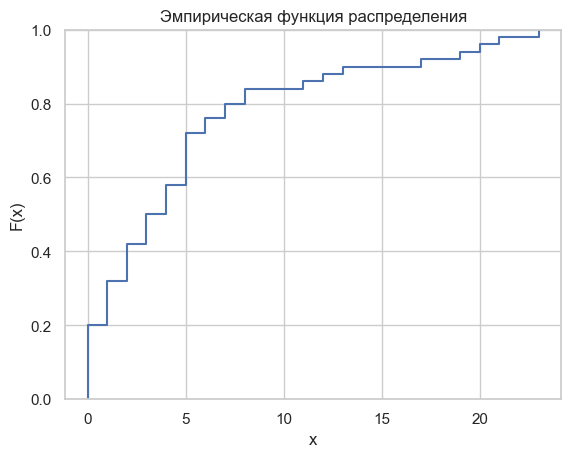

In [175]:
#n = len(row)
sns.ecdfplot(row) #построение эмпирической функции распределения

plt.title("Эмпирическая функция распределения")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

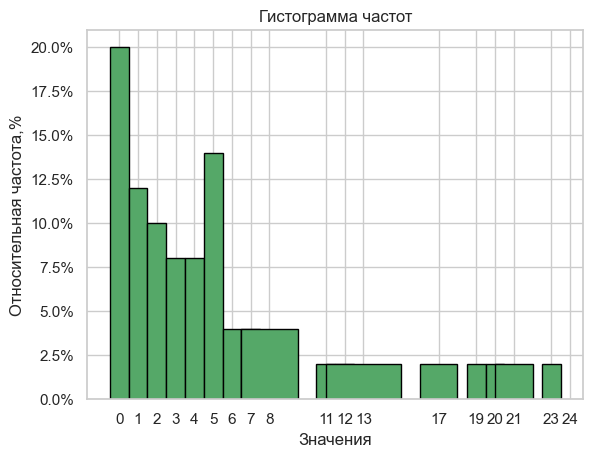

In [176]:
from matplotlib.ticker import PercentFormatter
unique_values, counts = zip(*[(value, row.count(value)) for value in sorted(set(row))])
unique_values = sorted(set(row + [max(unique_values) + 1]))
plt.hist(row, bins=unique_values, edgecolor='black', align='left', rwidth=1, color="g",  weights=[1/len(row)]*len(row))
plt.title('Гистограмма частот')
plt.xlabel('Значения')
plt.ylabel('Относительная частота,%')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(unique_values)
plt.show()

Получаем следующие выборочные аналоги:

Мат. ожидание : $\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i= 5.14$

Дисперсия: $S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)=34.64$

СКО: $S=\sqrt{S^2}=5.89$

Медиана:$ = n\cdot\frac{1}{2} = 50\cdot\frac{1}{2}=25\in \mathbb{Z} \Rightarrow z_{50,\frac{1}{2}} =  \left[ X_{(25)},X_{(26)} \right) = \left[0,1\right) \Rightarrow z_{50,\frac{1}{2}} = 3.5$

Коэффициент асимметрии:$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3} = 1.607$

Коэффициент эксцесса: $\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3 =  1.7861$

Вероятность попадания в промежуток: $P(0≤X≤9.38) = \frac{42}{50} = 0.84 $

​
 




In [177]:
a = 0.00
b = 9.38
mean = np.mean(row)  # Выборочное математическое ожидание
variance = np.var(row)  # Дисперсия
deviation=np.std(row) #СКО
median = np.median(row)  # Медиана
skewness = stats.skew(row)  # Асимметрия
kurtosis = stats.kurtosis(row)  # Эксцесс
probability = len([x for x in row if a <= x <= b]) / len(row)  # Вероятность
print("Мат.ожидание=",mean)
print("Дисперсия=",variance)
print("Выборочное стандартное отклонение=",deviation)
print("Медиана=",median)
print("Асимметрия=",skewness)
print("Эксцесс=",kurtosis)
print("Вероятность попадания в промежуток=",probability)

Мат.ожидание= 5.14
Дисперсия= 34.64039999999999
Выборочное стандартное отклонение= 5.885609569110067
Медиана= 3.5
Асимметрия= 1.607359708702955
Эксцесс= 1.7861279774877694
Вероятность попадания в промежуток= 0.84


#### c)В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку максимального правдободобия и оценку по методу моментов параметра $\lambda$.Найти смещение оценки.

Построим ОМП.

Плотность распределения Пуассона: $P_{\lambda}(X=k)=\frac{\lambda^{k}}{k!}\cdot exp(-\lambda)$

 Функция правдоподобия:

$L(\overrightarrow{X};\theta)=\prod_{i=1}^{n}P_{\lambda}(X_{i})=\prod_{i=1}^{n}\frac{\lambda^{X_{i}}}{X_{i}!}\cdot exp(-\lambda)=\frac{\lambda^{\sum_{i=1}^{n}X_{i}}}{\prod_{i=1}^{n}(X_{i}!)}\cdot exp(-n\cdot \lambda)$

Прологарифмируем функцию правдоподобия(в силу монотоности логарифма задача максимизации функции правдободобия сводится к задаче максимизации её логарифма по всем $\theta \in \Theta$):

$LL(\overrightarrow{X};\theta)= \sum_{i=1}^{n}X_{i}\cdot \ln(\lambda)-\ln(\prod_{i=1}^{n}X_{i}!)-n\cdot \lambda$

Найдем частную производную по параметру $\lambda$ и приравняем производную к нулю:

$\frac{\partial LL(\overrightarrow{X};\theta)}{\partial \lambda} = \frac{\sum_{i=1}^{n}X_{i}}{\lambda}-n=0\to \frac{\sum_{i=1}^{n}X_{i}}{\lambda}=n\to \lambda=\frac{1}{n}\cdot \sum_{i=1}^{n}X_{i}\to \widehat{\theta}=\widehat{\lambda}=\overline{X}$.

Выборка нам известна, и мы можем посчитать, чему равен параметр:$\widehat{\lambda}=\overline{X}=5.14$

Тогда мы получим $\widehat{\theta}=\widetilde{\lambda}=\overline{X}=5.14$ - ОМП

Построим по ОММ.
Для закона Пуассона $P_{\lambda}(X=k)=\frac{\lambda^{k}}{k!}\cdot exp(-\lambda)$

нам известно, что первый момент $\mathbb{E}X_{1}=\lambda;M_{1}=\overline{X}$
равен нашему параметру, и поскольку у нас 1-но мерный параметр, то у нас будет система из одного уравнения.



Для нахождения НРМД-оценки нам понадобится найти мат. ожидание от ОМП.

$g\left(T(\overrightarrow{X})\right)=\lambda^{\sum_{i=1}^{n}X_{i}}\cdot exp(-n\cdot \lambda)$

$h(\overrightarrow{X})=\frac{1}{\prod_{i=1}^{n}X_{i}!}$

 $T=\sum_{i=1}^{n}X_{i}=257$ - МДС

Распределение Пуассона принадлежит экспоненциальному семейству распределения, следовательно, МДС будет являться ПДС.

$\mathbb{E}{\widehat{\theta}} = \mathbb{E}\overline{X}=\mathbb{E}\frac{1}{n}\cdot \sum_{i=1}^{n}x_{i}=\frac{1}{n}\cdot \mathbb{E}\sum_{i=1}^{n}x_{i}=\frac{1}{n}\cdot \sum_{i=1}^{n}\mathbb{E}X_{1}=\frac{1}{n}\cdot n\cdot \mathbb{E}X_{1}=\lambda=5.14$

$\mathbb{\widetilde{\theta}} = 5.14$-НРМД-оценка



#### d) Построение асимптотического доверительного интервала уровня значимости $\alpha_1$ для параметра $\lambda$ на основе функции максимального правдоподобия.

$\alpha_1 = 0.2$

1. **Построение на основе оценки максимального правдоподобия (ОМП):**

    $\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$
   

    Используем оценку максимального правдоподобия (ОМП) для параметра $\lambda$, обозначенную как $\widehat{\lambda}$, которая равна среднему значению выборки $\overline{X} = 5.14$. Тогда асимптотический доверительный интервал строится вокруг этой точечной оценки.

    Информация Фишера для нашего параметра $\lambda$ вычисляется как $I(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left( -\frac{\sum_{i=1}^{n}X_{i}}{\lambda^{2}} \right)=\frac{n}{\lambda^{2}}$.

    Тогда $\sqrt{n\cdot I\left(  \widehat{\theta}(\overrightarrow{X})\right)}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,1)$

    Выбор $X_{\alpha}$: $\mathrm{Ф}(X_{\alpha})=1-\frac{\alpha_{1}}{2}=1-\frac{0.2}{2}=0.9 \to X_{0.9}=1.28$

    *Асимптотический доверительный интервал:*

    $\left[\overline{X} - \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha} , \overline{X} + \sqrt{\frac{\overline{X}}{n}} \cdot x_{\alpha}\right] \ni \lambda$

    Таким образом, АДИ уровня значимости $\alpha_1$ для параметра $\lambda$:
    $\left[4.73, 5.55\right] \ni \lambda$

2. **Построение на основе асимптотической нормальной оценки $\widehat{\theta}$:**

    Теперь рассмотрим альтернативный метод построения доверительного интервала. Мы можем использовать асимптотическую нормальную оценку для $\widehat{\theta}$, которая дает нам более общий вид доверительного интервала.

    $\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,\sigma^{2}(\theta))$

    $\sqrt{n}\frac{ \widehat{\theta}(\overrightarrow{X})-\theta}{\sigma(\widehat{\theta})}\sim N(0,1)$

    $X_{\alpha}: \mathrm{Ф(X_{\alpha})}=0.90\to X_{0.90}=1.28$

    $-X_{0.90}\le \sqrt{n}\cdot \frac{\widehat{\lambda}-\lambda}{\sqrt{\widehat{\lambda}}}\le X_{0.90}$

    $5.14-\frac{1.28\cdot 5.14}{\sqrt{50}}\le \lambda\le 5.14+\frac{1.28\cdot 5.14}{\sqrt{50}}$

    $ \lambda \in \left[4.73,5.55\right]$ - Асимптотический доверительный интервал на основе ОМП с доверительной точностью 0.9

In [178]:
from math import sqrt

n = len(row)
xAlpha = stats.norm.ppf(0.9)

Ex = 5.14
lambda_min = Ex - xAlpha/sqrt(n/Ex)
lambda_max = Ex + xAlpha/sqrt(n/Ex)
print(xAlpha)
print("Асимптотический доверительный интервал на базе ОМП:λ от ",round(lambda_min,2), " до ", round(lambda_max,2),"с доверительной точностью", 0.9 )

1.2815515655446004
Асимптотический доверительный интервал на базе ОМП:λ от  4.73  до  5.55 с доверительной точностью 0.9


### е) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_0 = 4$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.2$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.



$\lambda_0 = 4 \:\alpha_1=0.2$  
$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\frac{\lambda_{0}^{k}}{k!}exp(-\lambda_{0})$


**Объединяем малочисленные частоты у которых n<5:**

1. Определение категорий и частот:
   
   $   I_1 = \left(-\infty,0 \right], \quad n_1 = 10 $

   $   I_2 = \left(0,1 \right], \quad n_2 = 6 $

   $   I_3 = \left(1,2 \right], \quad n_3 = 5 $

   $   I_4 = \left(2,4 \right], \quad n_4 = 8 $

   $   I_5 = \left(4,5 \right], \quad n_5 = 7 $

   $   I_6 = \left(5,8 \right], \quad n_6 = 6 $

   $   I_7 = \left(8,23 \right], \quad n_7 = 8 $
   

2. Вычисление теоретических вероятностей $\mathbb{P}_i$:

   $\mathbb{P}_{1} =  \frac{4^{0}}{0!}exp(-4) = 0.018$

      $\mathbb{P}_{2} = \sum \limits_{k=0}^1 \large \frac{4^{k}}{k!}exp(-4)- \frac{4^0}{0!}e^{-4} = 0.07 $

      $\mathbb{P}_{3} = \sum \limits_{k=0}^2 \large \frac{4^{k}}{k!}exp(-4)  - \sum \limits_{k=0}^1 \large \frac{4^{k}}{k!}exp(-4) = 0.14$

      $\mathbb{P}_{4} = \sum \limits_{k=0}^4 \large \frac{4^{k}}{k!}exp(-4)  - \sum \limits_{k=0}^2 \large \frac{4^{k}}{k!}exp(-4) = 0.391 $

      $\mathbb{P}_{5} = \sum \limits_{k=0}^5 \large \frac{4^{k}}{k!}exp(-4)  - \sum \limits_{k=0}^4 \large \frac{4^{k}}{k!}exp(-4) = 0.16$

      $\mathbb{P}_{6} = \sum \limits_{k=0}^8 \large \frac{4^{k}}{k!}exp(-4)  - \sum \limits_{k=0}^5 \large \frac{4^{k}}{k!}exp(-4) = 0.194 $
      
      $\mathbb{P}_{7} = \sum \limits_{k=0}^{23} \large \frac{4^{k}}{k!}exp(-4)  - \sum \limits_{k=0}^8 \large \frac{4^{k}}{k!}exp(-4) = 0.0214$




3. Вычисление статистики критерия $\chi^2$:

   $\chi^2 = \sum \limits_{i=1}^7 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 145.61$

4. Сравнение с критическим значением:
   - Из таблицы для распределения $\chi^2$ с 6 степенями свободы при уровне значимости $\alpha = 0.2$ значение критерия составляет $\chi_{7, 0.2}^2 \approx 8.55$.
   - Так как $\chi^2 > \chi_{7, 0.2}^2$, мы отвергаем гипотезу о согласии распределений.

5. Оценка уровня значимости:
   - Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 0.199, исходя из таблицы значений $\chi^2$.



In [179]:
lam0=4
I = [(-math.inf,0), (0,1),(1,2),(2,4),(4,5),(5,8),(8,23)]

n_i = [10,6, 5, 8,7,6,8] ;p_i = [] ;np_i = [] ; n_i_np_i = [] ; res = []
for i in I:
 p_i.append(round(sp.poisson.cdf(i[1], lam0) - sp.poisson.cdf(i[0], lam0), 4))
print("теоретические вероятности:" ,p_i)
for i in range (len(I)):
 np_i.append(round(n*p_i[i], 4))
#print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print("xsi^2", sum(res))
print(round(1 - sp.chi2.cdf(sum(res), 7)))
print("x_alpha_1 равен:", stats.chi2.ppf(1 - 0.2, df=6))
print('p-value = ', 1 - stats.chi2.cdf(stats.chi2.ppf(1 - 0.2, df=8-1), 6))

теоретические вероятности: [0.0183, 0.0733, 0.1465, 0.3907, 0.1563, 0.1935, 0.0214]
xsi^2 145.60539999999997
0
x_alpha_1 равен: 8.558059720250668
p-value =  0.1331858753042796


#### f)Построить критерий значимости  $\mathcal{X^{2}}$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу по уровню значимости $\alpha_{1}$.Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$\widehat{\theta}=\overline{X}=5.14  \quad \alpha_1=0.2$ 

$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\frac{\overline{X}^{k}}{k!}exp(-\overline{X})$

**Объединяем малочисленные частоты у которых n<5:**

1. Определение категорий и частот:
   
   $   I_1 = \left(-\infty,0 \right], \quad n_1 = 10 $

   $   I_2 = \left(0,1 \right], \quad n_2 = 6 $

   $   I_3 = \left(1,2 \right], \quad n_3 = 5 $

   $   I_4 = \left(2,4 \right], \quad n_4 = 8 $

   $   I_5 = \left(4,5 \right], \quad n_5 = 7 $

   $   I_6 = \left(5,8 \right], \quad n_6 = 6 $

   $   I_7 = \left(8,23 \right], \quad n_7 = 8 $
   

2. Вычисление теоретических вероятностей $\mathbb{P}_i$:

   $\mathbb{P}_{1} =  \frac{5.14^{0}}{0!}exp(-5.14) = 0.006$

      $\mathbb{P}_{2} = \sum \limits_{k=0}^1 \large \frac{5.14^{k}}{k!}exp(-5.14)- \frac{5.14^0}{0!}e^{-5.14} = 0.03 $

      $\mathbb{P}_{3} = \sum \limits_{k=0}^2 \large \frac{5.14^{k}}{k!}exp(-5.14)  - \sum \limits_{k=0}^1 \large \frac{5.14^{k}}{k!}exp(-5.14) = 0.08$

      $\mathbb{P}_{4} = \sum \limits_{k=0}^4 \large \frac{5.14^{k}}{k!}exp(-5.14)  - \sum \limits_{k=0}^2 \large \frac{5.14^{k}}{k!}exp(-5.14) = 0.303 $

      $\mathbb{P}_{5} = \sum \limits_{k=0}^5 \large \frac{5.14^{k}}{k!}exp(-5.14)  - \sum \limits_{k=0}^4 \large \frac{5.14^{k}}{k!}exp(-5.14) = 0.18$

      $\mathbb{P}_{6} = \sum \limits_{k=0}^8 \large \frac{5.14^{k}}{k!}exp(-5.14)  - \sum \limits_{k=0}^5 \large \frac{5.14^{k}}{k!}exp(-5.14) = 0.331 $
      
      $\mathbb{P}_{7} = \sum \limits_{k=0}^{23} \large \frac{5.14^{k}}{k!}exp(-5.14)  - \sum \limits_{k=0}^8 \large \frac{5.14^{k}}{k!}exp(-5.14) = 0.08$




3. Вычисление статистики критерия $\chi^2$:

   $\chi^2 = \sum \limits_{i=1}^3 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 291.21$

4. Сравнение с критическим значением:
   - Из таблицы для распределения $\chi^2$ с 6 степенями свободы при уровне значимости $\alpha = 0.2$ значение критерия составляет $\chi_{7, 0.2}^2 \approx 8.55$.
   - Так как $\chi^2 > \chi_{7, 0.2}^2$, мы отвергаем гипотезу о согласии распределений.

5. Оценка уровня значимости:
   - Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 0.199, исходя из таблицы значений $\chi^2$.





In [180]:
p_i =[]
for i in I:
 p_i.append(round(sp.poisson.cdf(i[1], Ex) - sp.poisson.cdf(i[0], Ex), 4))
print("теоретические вероятности:" ,p_i)
for i in range (len(I)):
 np_i.append(round(n*p_i[i], 4))
#print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print(1 - sp.chi2.cdf(sum(res), 6))
print("xsi^2", sum(res))
print("x_alpha_1 равен:", stats.chi2.ppf(1 - 0.2, df=6))
print('p-value = ', 1 - stats.chi2.cdf(stats.chi2.ppf(1 - 0.2, df=8-1),6 ))
   

теоретические вероятности: [0.0059, 0.0301, 0.0774, 0.3029, 0.1751, 0.331, 0.0776]
0.0
xsi^2 291.2108
x_alpha_1 равен: 8.558059720250668
p-value =  0.1331858753042796


### 1.g Построить наиболее мощный критерий проверки простой гипотезы пуассоновости с параметром $\lambda = \lambda_0 = 4$ при альтернативе пуассоновости с параметром $\lambda = \lambda_1 = 6$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.2$. Что получится, если поменять местами основную и альтернативную гипотезы?



$ H_{0}:\lambda = \lambda_{0}$

$ H_{1}:\lambda = \lambda_{1}$


Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0}) = \frac{L\left( \overrightarrow{X},\lambda_{1} \right)}{L\left( \overrightarrow{X},\lambda_{0} \right)}= \frac{\lambda_{1}^{\sum_{i=1}^{50}X_{i}}\cdot exp(-n\cdot \lambda_{1})}{\lambda_{0}^{\sum_{i=1}^{50}X_{i}}\cdot exp(-n\cdot \lambda_{0})} = \left(\frac{\lambda_{1}}{\lambda_{0}}\right)^{\sum_{i=1}^{50}X_{i}} \cdot exp(-n\cdot \lambda_{1} + n\cdot \lambda_{0} )$

Критерий для принятия альтернативной гипотезы:

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1}) > c\Leftrightarrow \overline{X}> c$

Нормализованная статистика:

$\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}\sim N(0,1)$

Уровень значимости:

$\alpha = 0.2$

$P\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)\gt \sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}=1-\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)=\alpha_{1}$

$\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}} \right)=1-\alpha_{1}=0.8$

$\sqrt{n}\frac{\overline{X}-\lambda_{0}}{\sqrt{\overline{X}}}\gt \sqrt{n}\frac{c-\lambda_{0}}{\sqrt{\overline{X}}} = 0.84$

$c=\frac{0.84 \cdot \sqrt{\overline{X}}}{ \sqrt{n}} + \lambda_{0}  = 4 + \frac{0.84 \cdot \sqrt{5.14}}{ \sqrt{50}} = 4.27$

$ \overline{X} > c \to $  Принимаем гипотезу

**Поменяем местами основную и альтернативную гипотезу:**

$H_{0}=\lambda_{1}$

$H_{1}=\lambda_{0}$

Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1}) = \frac{L\left( \overrightarrow{X},\lambda_{0} \right)}{L\left( \overrightarrow{X},\lambda_{1} \right)}= \frac{\lambda_{0}^{\sum_{i=1}^{50}X_{i}}\cdot exp(-n\cdot \lambda_{0})}{\lambda_{1}^{\sum_{i=1}^{50}X_{i}}\cdot exp(-n\cdot \lambda_{1})} = \left(\frac{\lambda_{0}}{\lambda_{1}}\right)^{\sum_{i=1}^{50}X_{i}} \cdot e^{-n\cdot \lambda_{0} + n\cdot \lambda_{1} }$

Критерий для принятия альтернативной гипотезы:

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0})\gt c\Leftrightarrow \overline{X}\gt c$

Нормализованная статистика:

$\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}\sim N(0,1)$

$P\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)\gt \sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}=1-\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)=\alpha_{1}$

Уровень значимости:

$\alpha = 0.2$

$\Phi\left(\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}} \right)=1-\alpha_{1}=0.8$

$\sqrt{n}\frac{\overline{X}-\lambda_{1}}{\sqrt{\overline{X}}}\gt \sqrt{n}\frac{c-\lambda_{1}}{\sqrt{\overline{X}}} = 0.84$

$c=\frac{0.84 \cdot \sqrt{\overline{X}}}{ \sqrt{n}} + \lambda_{1}  = 6 + \frac{0.84 \cdot \sqrt{5.14}}{ \sqrt{50}} = 6.27$

$ c > \overline{X} \to $  Отвергаем гипотезу


In [181]:
xAlpha = stats.norm.ppf(0.8)
print(xAlpha)

c1 = 4 +((0.84*sqrt(5.14))/sqrt(50))
c2 = 6 +((0.84*sqrt(5.14))/sqrt(50))

print("основная гипотеза = λ0 = 4:",c1)
print("основная гипотеза = λ1 = 6:",c2)

0.8416212335729143
основная гипотеза = λ0 = 4: 4.2693244883036074
основная гипотеза = λ1 = 6: 6.2693244883036074


### 1.h В пунктах (c) - (f) заменить семейство распределений Пуассона на семейство геометрических распределений:
$$\mathbb{P}_{\lambda}\left(X = k\right) = \frac{\lambda^k}{(\lambda + 1)^{k+1}}, k \in \mathbb{Z}_+$$

#### h.c)В предположении, что исходные наблюдения являются выборкой из геометрического распределения, построить ОМП и ОММ параметра $\lambda$.Найти смещение оценки.



$\mathbb{P}_{\lambda}\left(X = k\right) = \frac{\lambda^k}{(\lambda + 1)^{k+1}} $



**Оценка максимального правдоподобия:**

$L(\overrightarrow{X};\theta)=\prod_{i=1}^{n}P_{\lambda}(X_{i})=\prod_{i=1}^{n}\frac{\lambda^{X_{i}}}{(\lambda+1)^{X_{i}}}=\frac{\lambda^{\sum_{i=1}^{n}X_{i}}}{(\lambda+1)^{\sum_{i=1}^{n}X_{i}+n}}$


$ L(\vec{X}, \theta) = \small \displaystyle \prod_{i = 1}^{n} \frac{\large \lambda^{X_i}}{(\lambda + 1)^{X_i + 1}}  = \frac{\large \lambda^{n \bar{X}}}{(\lambda + 1)^{n \bar{X} + n}}$ 

Прологарифмируем функцию правдоподобия(в силу монотоности логарифма задача максимизации функции правдободобия сводится к задаче максимизации её логарифма по всем $\theta \in \Theta$):

$ LL(\vec{X}, \theta) = n \bar{X} \ ln \lambda - \left( n \bar{X} + n \right) ln (\lambda + 1) $ 

$ \frac{\large \partial LL(\vec{X}, \theta)}{\large \partial \lambda} =  \frac{\large n \bar{X}}{\large \lambda} - \frac{\large n \bar{X} + n}{\lambda + 1} = 0 \implies \hat{\lambda} = \bar{X} = 5.14$ 

\
\
**Расчёт ОММ**

$ EX_1 = \lambda $\
$ M_1 = \bar{X} $ \
$ \hat{\lambda} = \bar{X} = 5.14$\
\
\
**Оценки совпадают. Посчитаем смещещение оценок.**

$ E \hat{\lambda} = E \bar{X} = \frac{1}{n} E \displaystyle \sum_{i=1}^{n}{X_i} = \frac{1}{n} \displaystyle \sum_{i=1}^{n} E {X_i} = \frac{1}{n} \displaystyle \sum_{i=1}^{n} \lambda  = \frac{\lambda n}{n} = \lambda $\
 Тогда полученные оценки являются несмещёнными.



#### h.d)Построить асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе ОМП

$ \widehat{\theta} = 5.14 \quad a_1 = 0.2 $ - ОМП

 **На основе ОМП.** 
 
$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N\left( 0, \frac{1}{I(\theta)} \right)$


информация Фишера: $I(\theta)=-\mathbb{E}\left( \frac{\partial^{2} LL}{\partial \lambda^{2}} \right)=-\mathbb{E}\left( -\frac{\sum_{i=1}^{n}X_{i}}{\lambda^{2}}+\frac{\sum_{i=1}^{n}X_{i}+n}{(\lambda +1)^{2}} \right)=\frac{n}{\lambda^{2}}-\mathbb{E}\left( \frac{\sum_{i=1}^{n}X_{i}+n}{(\lambda+1)^{2}} \right) = \frac{n}{\lambda^{2}}-\mathbb{E}\left( \frac{\sum_{i=1}^{n}X_{i}}{(\lambda+1)^{2}} \right)-\mathbb{E}\left( \frac{n}{(\lambda+1)^{2}} \right)=\frac{n}{\lambda^{2}}-\frac{n}{(\lambda+1)^{2}}-\frac{n}{(\lambda+1)^{2}}=\frac{n(\lambda^{2}+1)}{(\lambda+1)^{2}\cdot \lambda^{2}}$

Тогда $\sqrt{n\cdot I\left(  \widehat{\theta}(\overrightarrow{X})\right)}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,1)$

Выбираем $X_{\alpha}$: $\mathrm{Ф}(X_{\alpha})=1-\frac{\alpha_{1}}{2}=1-\frac{0.2}{2}=0.90 $

$ X_{0.90}=1.28$

$А.Д.И. \left[ \overline{X}-\frac{X_{0.90}}{\sqrt{n\cdot \frac{n({\bar{X}^{2}}+1)}{({\bar{X}}+1)^{2}\cdot {\bar{X}^{2}}}}};{\overline{X}}+\frac{X_{0.90}}{\sqrt{n\cdot \frac{n({\bar{X}^{2}}+1)}{({\bar{X}}+1)^{2}\cdot {\bar{X}^{2}}}}} \right]$

$\lambda \in [4.23;6.05]$

$4.23\le \lambda\le 6.05$ - Асимп. довер. интервал параметра $\lambda$.


In [182]:
xAlpha = stats.norm.ppf(0.9)
adi_2 = []
E = 5.14
SKO = 5.89
left_border = E - (xAlpha * SKO / math.sqrt(n*n*(E**2+1)/((E+1)**2*(E**2))))
right_border = E + (xAlpha * SKO / math.sqrt(n*n*(E**2+1)/((E+1)**2*(E**2))))
adi_2.append(round(left_border, 2))
adi_2.append(round(right_border, 2))
print("Асимптотический доверительный интервал: ", adi_2)

Асимптотический доверительный интервал:  [4.23, 6.05]


#### h.e)Используя гистограмму частот, построить критерий значимости $\mathcal{X^{2}}$ проверки простой гипотезы согласия с геометрическим распределением с параметром $\lambda_{0}$. Проверить гипотезу на урокень значимости $\alpha_{1}$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$\lambda_0 = 4  \quad \alpha_1=0.2$ 

$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\frac{\lambda_{0}^{k}}{(\lambda_{0}+1)^{k+1}}$

**Объединяем малочисленные частоты у которых n<5:**

1. Определение категорий и частот:
   
   $   I_1 = \left(-\infty,0 \right], \quad n_1 = 10 $

   $   I_2 = \left(0,1 \right], \quad n_2 = 6 $

   $   I_3 = \left(1,2 \right], \quad n_3 = 5 $

   $   I_4 = \left(2,4 \right], \quad n_4 = 8 $

   $   I_5 = \left(4,5 \right], \quad n_5 = 7 $

   $   I_6 = \left(5,8 \right], \quad n_6 = 6 $

   $   I_7 = \left(8,23 \right], \quad n_7 = 8 $
   

2. Вычисление теоретических вероятностей $\mathbb{P}_i$:

   $\mathbb{P}_{1} =  \frac{4^{0}}{(4+1)^{0+1}} = 0.2$

      $\mathbb{P}_{2} = \sum \limits_{k=0}^1 \large \frac{4^{k}}{(4+1)^{k+1}} - \frac{4^{0}}{(4+1)^{0+1}} = 0.16 $

      $\mathbb{P}_{3} = \sum \limits_{k=0}^2 \frac{4^{k}}{(4+1)^{k+1}}  - \sum \limits_{k=0}^1 \large \frac{4^{k}}{(4+1)^{k+1}} = 0.13$

      $\mathbb{P}_{4} = \sum \limits_{k=0}^4 \large \frac{4^{k}}{(4+1)^{k+1}}  - \sum \limits_{k=0}^2 \large \frac{4^{k}}{(4+1)^{k+1}} = 0.18 $

      $\mathbb{P}_{5} = \sum \limits_{k=0}^5 \large \frac{4^{k}}{(4+1)^{k+1}}  - \sum \limits_{k=0}^4 \large \frac{4^{k}}{(4+1)^{k+1}} = 0.07$

      $\mathbb{P}_{6} = \sum \limits_{k=0}^8 \large \frac{4^{k}}{(4+1)^{k+1}}  - \sum \limits_{k=0}^5 \large \frac{4^{k}}{(4+1)^{k+1}} = 0.13 $
      
      $\mathbb{P}_{7} = \sum \limits_{k=0}^{23} \large \frac{4^{k}}{(4+1)^{k+1}}  - \sum \limits_{k=0}^8 \large \frac{4^{k}}{(4+1)^{k+1}} = 0.13$




3. Вычисление статистики критерия $\chi^2$:

   $\chi^2 = \sum \limits_{i=1}^7 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 5.59$

4. Сравнение с критическим значением:
   - Из таблицы для распределения $\chi^2$ с 6 степенями свободы при уровне значимости $\alpha = 0.2$ значение критерия составляет $\chi_{7, 0.2}^2 \approx 9.80$.
   - Так как $\chi_{7, 0.2}^2 > \chi^2 $, мы принимаем гипотезу о согласии распределений.

5. Оценка уровня значимости:
   - Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 0.47, исходя из таблицы значений $\chi^2$.



In [183]:
def geom(x, lambd):
 res_g = 0
 for i in range(0, x + 1):
     res_g += (lambd**i)/((lambd+1)**(i+1))
 return res_g
lam0=4
I = [(-math.inf,0), (0,1),(1,2),(2,4),(4,5),(5,8),(8,23)]
n_i = [10,6, 5, 8,7,6,8] ;p_i = [] ;np_i = [] ; n_i_np_i = [] ; res = []
n_inter = len(I) - 1
p_i.append(geom(0, lam0))
for i in range(1, len(n_i)):
 p_i.append(round(geom(I[i][1], lam0) - geom(I[i][0], lam0), 4))
print("теоретические вероятности:",p_i)
for i in range(len(n_i)):
 np_i.append(round(p_i[i]*n, 4))
#print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print("xsi^2", sum(res))
#print(1 - sp.chi2.cdf(sum(res), 4))
print(1 - sp.chi2.cdf(sum(res), 6))
print("x_alpha_1 равен:", stats.chi2.ppf(1 - 0.2, df=n_inter))
print('p-value = ', 1 - stats.chi2.cdf(stats.chi2.ppf(1 - 0.2, df=n_inter),n_inter)) 

теоретические вероятности: [0.2, 0.16, 0.128, 0.1843, 0.0655, 0.1279, 0.1295]
xsi^2 5.5868
0.4710284427947752
x_alpha_1 равен: 8.558059720250668
p-value =  0.19999999999999996


#### h.f)Построить критерий значимости  $\mathcal{X^{2}}$ проверки сложной гипотезы согласия с геометрическим распределением. Проверить гипотезу по уровню значимости $\alpha_{1}$.Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$\widehat{\theta}=\overline{X}=5.14  \quad \alpha_1=0.2$ 

$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\frac{\overline{X}^{k}}{\left( \overline{X} +1\right)^{k+1}}$

**Объединяем малочисленные частоты у которых n<5:**

1. Определение категорий и частот:
   
   $   I_1 = \left(-\infty,0 \right], \quad n_1 = 10 $

   $   I_2 = \left(0,1 \right], \quad n_2 = 6 $

   $   I_3 = \left(1,2 \right], \quad n_3 = 5 $

   $   I_4 = \left(2,4 \right], \quad n_4 = 8 $

   $   I_5 = \left(4,5 \right], \quad n_5 = 7 $

   $   I_6 = \left(5,8 \right], \quad n_6 = 6 $

   $   I_7 = \left(8,23 \right], \quad n_7 = 8 $
   

2. Вычисление теоретических вероятностей $\mathbb{P}_i$:

   $\mathbb{P}_{1} =  \frac{5.14^{0}}{(5.14+1)^{0+1}} = 0.2$

      $\mathbb{P}_{2} = \sum \limits_{k=0}^1 \large \frac{5.14^{k}}{(5.14+1)^{k+1}} - \frac{5.14^{0}}{(5.14+1)^{0+1}} = 0.14 $

      $\mathbb{P}_{3} = \sum \limits_{k=0}^2 \frac{5.14^{k}}{(5.14+1)^{k+1}}  - \sum \limits_{k=0}^1 \large \frac{5.14^{k}}{(5.14+1)^{k+1}} = 0.11$

      $\mathbb{P}_{4} = \sum \limits_{k=0}^4 \large \frac{5.14^{k}}{(5.14+1)^{k+1}}  - \sum \limits_{k=0}^2 \large \frac{5.14^{k}}{(5.14+1)^{k+1}} = 0.18 $

      $\mathbb{P}_{5} = \sum \limits_{k=0}^5 \large \frac{5.14^{k}}{(5.144+1)^{5.14+1}}  - \sum \limits_{k=0}^4 \large \frac{5.14^{k}}{(5.14+1)^{k+1}} = 0.07$

      $\mathbb{P}_{6} = \sum \limits_{k=0}^8 \large \frac{5.14^{k}}{(5.14+1)^{k+1}}  - \sum \limits_{k=0}^5 \large \frac{5.14^{k}}{(5.14+1)^{k+1}} = 0.14 $
      
      $\mathbb{P}_{7} = \sum \limits_{k=0}^{23} \large \frac{5.14^{k}}{(5.14+1)^{k+1}}  - \sum \limits_{k=0}^8 \large \frac{5.14^{k}}{(5.14+1)^{k+1}} = 0.19$




3. Вычисление статистики критерия $\chi^2$:

   $\chi^2 = \sum \limits_{i=1}^3 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 4.61$

4. Сравнение с критическим значением:
   - Из таблицы для распределения $\chi^2$ с 6 степенями свободы при уровне значимости $\alpha = 0.2$ значение критерия составляет $\chi_{7, 0.2}^2 \approx 9.80$.
   - Так как $\chi_{7, 0.2}^2 > \chi^2 $, мы принимаем гипотезу о согласии распределений.

5. Оценка уровня значимости:
   - Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 0.59, исходя из таблицы значений $\chi^2$.



In [184]:
p_i = [] ;np_i = [] ; n_i_np_i = [] ; res = []

p_i.append(geom(0, lam0))
for i in range(1, len(n_i)):
 p_i.append(round(geom(I[i][1], Ex) - geom(I[i][0], Ex), 4))
print("теоретические вероятности:",p_i)
for i in range(len(n_i)):
 np_i.append(round(p_i[i]*n, 4))
#print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print("xsi^2", sum(res))

print(1 - sp.chi2.cdf(sum(res), 6))
print("x_alpha_1 равен:", stats.chi2.ppf(1 - 0.2, df=n_inter))
print('p-value = ', 1 - stats.chi2.cdf(stats.chi2.ppf(1 - 0.2, df=n_inter),n_inter)) 


теоретические вероятности: [0.2, 0.1363, 0.1141, 0.1755, 0.067, 0.1423, 0.1879]
xsi^2 4.611699999999999
0.5944880908332664
x_alpha_1 равен: 8.558059720250668
p-value =  0.19999999999999996


### Задание-2

#### a)Построить вариционный ряд, эмпирическую функцию распределения,гистограмму и полигон частот с шагом h = 0.80.

In [185]:
data2 = [1.19, 0.69, 4.55, 1.72, 0.66, 1.18, 3.50, 0.02, 1.79, 2.45, 2.34, 0.34, 1.82, 2.57, 2.97, 3.79, 2.47, 12.65, 0.12, 1.55, 0.58, 3.11, 0.66, 1.32, 1.42,
         2.18, 0.73, 0.82, 2.29, 1.88, 0.45, 0.91, 0.17, 0.76, 0.57, 0.85, 2.14, 0.10, 3.72, 4.22, 1.94, 0.54, 0.01, 2.12, 3.83, 2.18, 4.24, 5.09, 0.74, 4.63]
n = len(data2)
#вариационный ряд
data2.sort()


print( "Вариационный ряд:", data2)

Вариационный ряд: [0.01, 0.02, 0.1, 0.12, 0.17, 0.34, 0.45, 0.54, 0.57, 0.58, 0.66, 0.66, 0.69, 0.73, 0.74, 0.76, 0.82, 0.85, 0.91, 1.18, 1.19, 1.32, 1.42, 1.55, 1.72, 1.79, 1.82, 1.88, 1.94, 2.12, 2.14, 2.18, 2.18, 2.29, 2.34, 2.45, 2.47, 2.57, 2.97, 3.11, 3.5, 3.72, 3.79, 3.83, 4.22, 4.24, 4.55, 4.63, 5.09, 12.65]


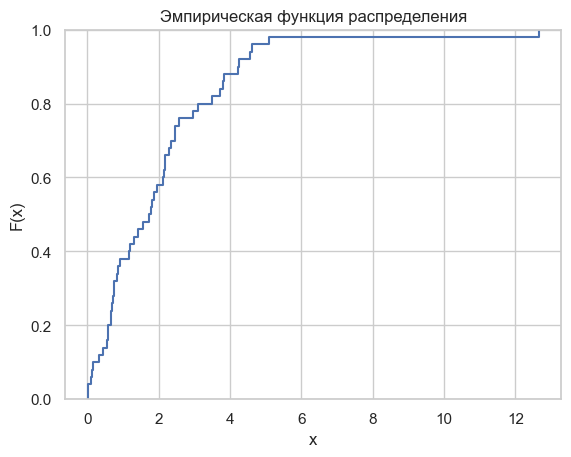

In [186]:
sns.ecdfplot(data2) #построение эмпирической функции распределения

plt.title("Эмпирическая функция распределения")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

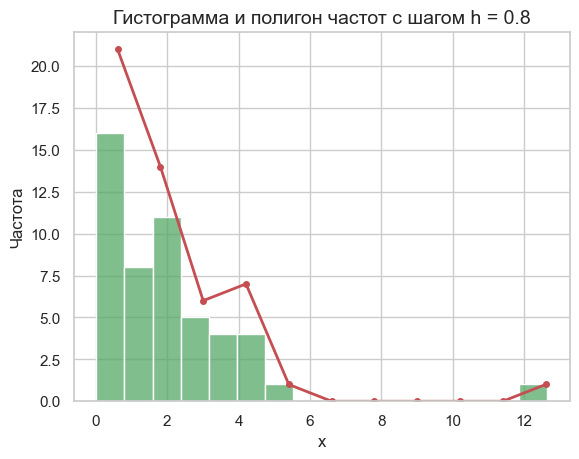

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming data2 is your dataset
data2 = [1.19, 0.69, 4.55, 1.72, 0.66, 1.18, 3.50, 0.02, 1.79, 2.45, 2.34, 0.34, 1.82, 2.57, 2.97, 3.79, 2.47, 12.65, 0.12, 1.55, 0.58, 3.11, 0.66, 1.32, 1.42,
         2.18, 0.73, 0.82, 2.29, 1.88, 0.45, 0.91, 0.17, 0.76, 0.57, 0.85, 2.14, 0.10, 3.72, 4.22, 1.94, 0.54, 0.01, 2.12, 3.83, 2.18, 4.24, 5.09, 0.74, 4.63]

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a histogram with seaborn
sns.histplot(x=data2, binwidth=0.8, color='g')

# Set the bins for the histogram
bins = np.arange(min(data2), max(data2) + 1.2, 1.2)

# Plot the frequency polygon
hist, _ = np.histogram(data2, bins=bins)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bin_centers, hist, '-r', marker='.', linewidth=2, markersize=8)

# Add title and labels
plt.title("Гистограмма и полигон частот с шагом h = 0.8", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("Частота", fontsize=12)

# Show the plot
plt.show()


#### b) Вычислить выборочные аналоги следующих числовых характеристик: (i)математическое ожидание, (ii)дисперсия, (iii)медианы, (iv)асимметрии, (v)эксцесса (vi) вероятности $\mathrm{P}(X\in \left[ a,b \right])$

Получаем следующие выборочные аналоги:

Мат. ожидание : $\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i= 2.05$

Дисперсия: $S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)=4.15$

СКО: $S=\sqrt{S^2}=2.036$

Медиана:$ = n\cdot\frac{1}{2} = 50\cdot\frac{1}{2}=25\in \mathbb{Z} \Rightarrow z_{50,\frac{1}{2}} =  \left[ X_{(25)},X_{(26)} \right) = \left[0,1\right) \Rightarrow z_{50,\frac{1}{2}} = 1.755$

Коэффициент асимметрии:$\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3} = 2.87$

Коэффициент эксцесса: $\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3 =  12.11$

Вероятность попадания в промежуток: $P(0≤X≤4) = \frac{44}{50} = 0.88 $

In [188]:
c = 0
d = 4
mean = np.mean(data2)  # Выборочное математическое ожидание
variance = np.var(data2)  # Дисперсия
deviation=np.std(data2) #СКО
median = np.median(data2)  # Медиана
skewness = stats.skew(data2)  # Асимметрия
kurtosis = stats.kurtosis(data2)  # Эксцесс
probability = len([x for x in data2 if c <= x <= d]) / len(data2)  # Вероятность
print("Мат.ожидание=",mean)
print("Дисперсия=",variance)
print("Выборочное стандартное отклонение=",deviation)
print("Медиана=",median)
print("Асимметрия=",skewness)
print("Эксцесс=",kurtosis)
print("Вероятность попадания в промежуток=",probability)

Мат.ожидание= 2.0513999999999997
Дисперсия= 4.1472200400000006
Выборочное стандартное отклонение= 2.036472450095999
Медиана= 1.755
Асимметрия= 2.8744148980388062
Эксцесс= 12.11407438255599
Вероятность попадания в промежуток= 0.88


#### c)В предположении, что исходные наблюдения являются выборкой из показательного распределения, построить ОМП и ОММ параметра $\lambda$.Найти смещение оценки.

Плотность показательного распределения: 

$f(x; \lambda) = 
\begin{cases}
\lambda \cdot exp(-\lambda x), & \text{если } x \geq 0 \\
0, & \text{если } x < 0
\end{cases}$

Для данной выборки это событие достоверное и всегда выполняется,   индикатором у плотности распределения можно не пиать



$P(X)=\lambda\cdot exp(-\lambda X)$

 Функция правдоподобия:

$L(\overrightarrow{X},\theta)= \prod_{i=1}^{n}P(x_i) = \prod_{i=1}^{n}\lambda\cdot exp(-\lambda\cdot X_{i})=\lambda^{n}\cdot exp(-\lambda\cdot \sum_{i=1}^{n}X_{i})$

Прологарифмируем функцию правдоподобия(в силу монотоности логарифма задача максимизации функции правдободобия сводится к задаче максимизации её логарифма по всем $\theta \in \Theta$):

$LL(\overrightarrow{X},\theta)=n\ln(\lambda)-\lambda\cdot \sum_{i=1}^{n}X_{i}$

$ \frac{\partial LL}{\partial \lambda} = \frac{n}{\lambda} - \sum \limits_{i=1}^{n}x_i = 0$

$ \widehat{\theta} = \widehat{\lambda} = \frac{1}{\overline{X}} = 0.487$ - ОМП

**Расчёт ОММ**

$\mathbb{E}(X_1)=a$  
 $M_1=\bar{x}=\cfrac{1}{n}\sum_{i=1}^nx_i = 0.487$  

 **Оценки совпали.Найдём смещение**

 $g\left(T(\overrightarrow{X})\right)=\lambda\cdot exp(-\lambda X)$

$h(\overrightarrow{X})=1$

$T=\sum_{i=1}^{n}X_{i}$.- МДС

Показательное распределение принадлежит экспоненциальному семейству распределения $\Rightarrow$ МДС =  ПДС.

$ \mathbb{E}_{\theta}\widehat{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta} n\cdot \sum \limits_{i=1}^{n}\frac{1}{x_i} = n (\frac1{λ})^{-1} \frac{Г(-1+n)}{Г(n)}=\frac{nλ}{n-1} =n \cdot\frac{1}{n-1}   \cdot \lambda = \frac{n\cdot\lambda}{n-1} \Rightarrow$ смещённая оценка.

$\mathbb{E}_{\lambda}\widetilde{\lambda}=\mathbb{E}_{\lambda}\widehat{\lambda}\frac{n-1}{n}=\frac{n-1}{n}\mathbb{E}_{\lambda}\widehat{\lambda}=\frac{n-1}{n}\cdot \frac{n\cdot \lambda}{n-1}=\lambda$-НРМД-оценка

$\widetilde{\theta} = \widetilde{\lambda} = \frac{1}{\overline{X}}$ -НРМД оценка

#### d)Построить А.Д.И. уровня значимости $\alpha_2$ для параметра $\lambda$ на базе ОМП

$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim N(0,\sigma^{2}(\theta))$

$\sqrt{n}\frac{ \widehat{\theta}(\overrightarrow{X})-\theta}{\sigma(\widehat{\theta})}\sim N(0,1)$

$ x_{α}: Ф(x_{α})=1-\frac{α}2=1-\frac{0.05}2=0.975 $

$ Ф(1,96)=0,9750 $  

 $x_{α}=1.96$



$X_{\alpha}: \mathrm{Ф(X_{\alpha})}=0.995\to X_{0.99}=2.5$

$-X_{0.975}\le \sqrt{n}\cdot \frac{\widehat{\lambda}-\lambda}{\sqrt{\widehat{\lambda}}}\le X_{0.975}$

$0.487\frac{1.96\cdot 0.487}{\sqrt{50}}\le \lambda\le 0.487+\frac{1.96\cdot 0.487}{\sqrt{50}}$


 $\lambda \in [0.35;0.62]$ - Асимптотический доверительный интерввал параметра $\lambda$

In [189]:
xAlpha = stats.norm.ppf(0.975)
print("xalpa = ", xAlpha)
E = 0.487
left_border = E - ((xAlpha*E)/sqrt(50))
right_border = E + ((xAlpha*E)/sqrt(50))
adi_2 = []
adi_2.append(round(left_border, 2))
adi_2.append(round(right_border, 2))
print("Асимптотический доверительный интервал: ", adi_2)


xalpa =  1.959963984540054
Асимптотический доверительный интервал:  [0.35, 0.62]


#### e) С использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия с показательным распределением с параметрами $ (\lambda_0 = 0.33) $. Проверить гипотезу на уровне значимости $ a_2 = 0.05 $. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Основаня гипотеза $ H_0 : X_1...X_n \sim \mathcal{N}(\alpha_0, \sigma_0^2) $\
Альтернативная гипотеза $ H_А : X_1...X_n$ не распределена, как $\mathcal{N}(\alpha_0, \sigma_0^2) $

Статистика критерия Колмогорова $ \widehat{D_n} = max| F_n(x) - Ф_{(\alpha_0, \sigma_0^2)}(x) | $. Построим критерий Колмогорова.\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq x_\alpha  \\ 1, \quad \widehat{D_n} > x_\alpha \end{cases}$, где $ x_\alpha: \mathcal{K_n}(x_\alpha) = 1 - \alpha_2 = 0.95 $


Критерий Колмогорова\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq 0.17  \\ 1, \quad \widehat{D_n} > 0.17 \end{cases}$




In [190]:
import scipy


lambda0 = 0.33
alpha_2 = 0.05
D = np.max(np.abs(expon.cdf(data2, scale=1/lambda0) - np.arange(1, n+1 / n)))
critical_value = kstwobign.ppf(1 - 0.2/2) / np.sqrt(n)
print("Вычисленное значение статистики Колмогорова D:",D)

print("xa = ",critical_value)
print("Наибольший уровень значимости без отвергания гипотезы:", 1 - scipy.stats.chi2.cdf(D,4))


Вычисленное значение статистики Колмогорова D: 49.216990870012914
xa =  0.17307822563424255
Наибольший уровень значимости без отвергания гипотезы: 5.260781810179083e-10


Т.к. $\widehat{D_n} > x_\alpha$, гипотеза $H_0$ отвергается.

#### f)Используя гистограмму частот, построить критерий значимости $\mathcal{X^{2}}$ проверки простой гипотезы согласия с показательным распределением с параметром $\lambda_{0}$. Проверить гипотезу на урокень значимости $\alpha_{2}$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\lambda_{0}\cdot exp(-\lambda_{0}\cdot k)$

**Объединяем малочисленные частоты у которых n<5:**

1. Определение категорий и частот:
   
   $   I_1 = \left(0,1 \right], \quad n_1 = 19 $

   $   I_2 = \left(1,2 \right], \quad n_2 = 10 $

   $   I_3 = \left(2,3 \right], \quad n_3 = 10 $

   $   I_4 = \left(3,4 \right], \quad n_4 = 5 $

   $   I_5 = \left(4,+\infty \right], \quad n_4 = 6$
  
   

2. Вычисление теоретических вероятностей $\mathbb{P}_i$:

   $\mathbb{P}_{1} =  \sum \limits_{k=0}^1 \large 0.33 \cdot exp(-0.33 \cdot k) - 0.33 \cdot exp(-0.33 \cdot 0) = 0.24$

      $\mathbb{P}_{2} = \sum \limits_{k=0}^2 \large 0.33 \cdot exp(-0.33 \cdot k) - \sum \limits_{k=0}^1 \large 0.33 \cdot exp(-0.33 \cdot k) = 0.17 $

      $\mathbb{P}_{3} = \sum \limits_{k=0}^3 \large 0.33 \cdot exp(-0.33 \cdot k) - \sum \limits_{k=0}^2 \large 0.33 \cdot exp(-0.33 \cdot k) = 0.12$

      $\mathbb{P}_{4} = \sum \limits_{k=0}^4 \large 0.33 \cdot exp(-0.33 \cdot k) - \sum \limits_{k=0}^3 \large 0.33 \cdot exp(-0.33 \cdot k) = 0.09 $
      
      $\mathbb{P}_{5} = \sum \limits_{k=0}^{+\infty} \large 0.33 \cdot exp(-0.33 \cdot k) - \sum \limits_{k=0}^4 \large 0.33 \cdot exp(-0.33 \cdot k) = 0.05 $





3. Вычисление статистики критерия $\chi^2$:

   $\chi^2 = \sum \limits_{i=1}^5 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 11.65$

4. Сравнение с критическим значением:
   - Из таблицы для распределения $\chi^2$ с 4 степенями свободы при уровне значимости $\alpha = 0.05$ значение критерия составляет $\chi_{4, 0.05}^2 \approx 9.49$.
   - Так как $\chi_{4, 0.05}^2 < \chi^2 $, мы отвергаем гипотезу о согласии распределений.

5. Оценка уровня значимости:
   - Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 0.0399, исходя из таблицы значений $\chi^2$.


In [191]:
import math

def pok(x, lambd):
    res_g = 0
    if math.isinf(x):  # Проверяем, является ли x бесконечностью
        return 1.0  # Если x бесконечность, вероятность равна 1
    for i in range(0, int(x) + 1):
        res_g += (lambd) * math.exp(-lambd * i)
    return res_g
p_i = [] ;np_i = [] ; n_i_np_i = [] ; res = []
xsi = 0
lam0 = 0.33
I = [(0, 1), (1, 2), (2, 3), (3, 4), (4, math.inf)]
n_i = [19, 10, 10, 5, 6]
p_i = []

# Вычисление вероятностей для каждого интервала

p_i.append(round(pok(1, lam0) - pok(0, lam0), 4))
p_i.append(round(pok(2, lam0) - pok(1, lam0), 4))
p_i.append(round(pok(3, lam0) - pok(2, lam0), 4))
p_i.append(round(pok(4, lam0) - pok(3, lam0), 4))
p_i.append(round(pok(math.inf, lam0) - pok(4, lam0), 4))

# Вывод результатов
print("Теоретические вероятности:", p_i)
for i in range(len(n_i)):
 np_i.append(round(p_i[i]*n, 100))
#print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print("xsi^2", sum(res))
#print(1 - sp.chi2.cdf(sum(res), 4))
print('p-value = ',1 - sp.chi2.cdf(sum(res), 5))
print("x_alpha_1 равен:", stats.chi2.ppf(1 - 0.05, df=n_inter))

Теоретические вероятности: [0.2372, 0.1706, 0.1226, 0.0882, 0.0514]
xsi^2 11.6516
p-value =  0.03988642979836532
x_alpha_1 равен: 12.591587243743977


#### g)Построить критерий значимости  $\mathcal{X^{2}}$ проверки сложной гипотезы согласия с показательным распределением. Проверить гипотезу по уровню значимости $\alpha_{2}$.Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\frac{1}{\overline{X}}\cdot exp(-\frac{1}{\overline{X}}\cdot k)$

**Объединяем малочисленные частоты у которых n<5:**

1. Определение категорий и частот:
   
   $   I_1 = \left(0,1 \right], \quad n_1 = 19 $

   $   I_2 = \left(1,2 \right], \quad n_2 = 10 $

   $   I_3 = \left(2,3 \right], \quad n_3 = 10 $

   $   I_4 = \left(3,4 \right], \quad n_4 = 5 $

   $   I_5 = \left(4,+\infty \right], \quad n_4 = 6$
  
   

2. Вычисление теоретических вероятностей $\mathbb{P}_i$:

   $\mathbb{P}_{1} =  \sum \limits_{k=0}^1 \large 0.487 \cdot exp(-0.487 \cdot k) - 0.487 \cdot exp(-0.487 \cdot 0) = 0.2992$

      $\mathbb{P}_{2} = \sum \limits_{k=0}^2 \large 0.487 \cdot exp(-0.487 \cdot k) - \sum \limits_{k=0}^1 \large 0.487\cdot exp(-0.487 \cdot k) = 0.1839 $

      $\mathbb{P}_{3} = \sum \limits_{k=0}^3 \large 0.33 \cdot exp(-0.487 \cdot k) - \sum \limits_{k=0}^2 \large 0.487 \cdot exp(-0.487 \cdot k) = 0.113$

      $\mathbb{P}_{4} = \sum \limits_{k=0}^4 \large 0.487 \cdot exp(-0.487 \cdot k) - \sum \limits_{k=0}^3 \large 0.487 \cdot exp(-0.487 \cdot k) = 0.069 $
      
      $\mathbb{P}_{5} = \sum \limits_{k=0}^{+\infty} \large 0.487 \cdot exp(-0.487 \cdot k) - \sum \limits_{k=0}^4 \large 0.487 \cdot exp(-0.487 \cdot k) = 0.153 $





3. Вычисление статистики критерия $\chi^2$:

   $\chi^2 = \sum \limits_{i=1}^5 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 5.53$

4. Сравнение с критическим значением:
   - Из таблицы для распределения $\chi^2$ с 4 степенями свободы при уровне значимости $\alpha = 0.05$ значение критерия составляет $\chi_{4, 0.05}^2 \approx 9.49$.
   - Так как $\chi_{4, 0.05}^2 > \chi^2 $, мы принимаем гипотезу о согласии распределений.

5. Оценка уровня значимости:
   - Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется 0.355, исходя из таблицы значений $\chi^2$.

In [192]:
p_i = [] ;np_i = [] ; n_i_np_i = [] ; res = []
xsi = 0
lam0 = 0.487
I = [(0, 1), (1, 2), (2, 3), (3, 4), (4, math.inf)]
n_i = [19, 10, 10, 5, 6]
p_i = []

# Вычисление вероятностей для каждого интервала

p_i.append(round(pok(1, lam0) - pok(0, lam0), 4))
p_i.append(round(pok(2, lam0) - pok(1, lam0), 4))
p_i.append(round(pok(3, lam0) - pok(2, lam0), 4))
p_i.append(round(pok(4, lam0) - pok(3, lam0), 4))
p_i.append(abs(round(pok(math.inf, lam0) - pok(4, lam0), 4)))

# Вывод результатов
print("Теоретические вероятности:", p_i)
for i in range(len(n_i)):
 np_i.append(round(p_i[i]*n, 100))
#print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print("xsi^2", sum(res))
#print(1 - sp.chi2.cdf(sum(res), 4))
print('p-value = ',1 - sp.chi2.cdf(sum(res), 5))
print("x_alpha_1 равен:", stats.chi2.ppf(1 - 0.05, df=n_inter))

Теоретические вероятности: [0.2992, 0.1839, 0.113, 0.0694, 0.1525]
xsi^2 5.5315
p-value =  0.3545041541616334
x_alpha_1 равен: 12.591587243743977


### 2.h Построить наиболее мощный критерий проверки простой гипотезы показательности с параметром $\lambda_0 = 0.33$ при альтернативе показательности с параметром $\lambda_1 = 0.50$.  Проверить гипотезу на уровне значимости $\alpha_2 = 0.05$. Что получится, если поменять местами  основную и альтернативную гипотезы?

сновная гипотеза: $H_{0}=\lambda_{0}=0.33$

Альтернативная гипотеза: $H_{A}=\lambda_{1}=0.5$


Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0}) = \left(\frac{\lambda_{1}}{\lambda_{0}}\right)^n \cdot e^{-\lambda_{1} \cdot {\sum_{i=1}^{50}X_{i}} + \lambda_{0} \cdot {\sum_{i=1}^{50}X_{i}} }$

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0})>  c\Leftrightarrow \overline{X} < c^*$

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0})<  c\Leftrightarrow \overline{X} > c^*$

$e^{{\sum_{i=1}^{50}X_{i}}\cdot (-\lambda_{1} + \lambda_{0})}=\left(\frac{\lambda_{0}}{\lambda_{1}}\right)^n c$

Логарифмируем:

(1)    $c* = {\sum_{i=1}^{50}X_{i}}=n \cdot ln\left(\left(\frac{\lambda_{0}}{\lambda_{1}}\right) c\right)$

$\sum_{i=1}^{50}X_{i}\sim \Gamma \left(n,\frac{1}{\lambda}\right)$

$1-\Phi_{\Gamma \left(n,\frac{1}{\lambda}\right)}(c)=\alpha_{2}$

$ c = \Phi^{-1}_{\Gamma \left(n,\frac{1}{\lambda}\right)}(1-\alpha_{2})$

$ c = 188.4$

Найдем с* подставив значени в выражение (1):

$ с* = 241.15$

$LR(\overrightarrow{X}, \lambda_{0}, \lambda_{1})  = 604577327.8$



$c > LR  \to$ принимаем гипотезу

In [193]:
lambda_1 =0.5  
lambda_0 = 0.33

c1 = sp.gamma.ppf(0.95, a =50, scale = 1/lambda_0)
print('c =', c1)
cSt1 = 50*np.log(lambda_0/lambda_1*c1)
print('c* = ',cSt1)
LR1 = ((lambda_0/lambda_1)**50)*math.exp(lambda_1*cSt1 - lambda_0*cSt1)
print('LR =', LR1,'\n')

c = 188.3971415212183
c* =  241.15183728364053
LR = 604577327.819885 



**Меняем местами основную и альтернативную гипотезу:**

$H_{0}=\lambda_{1}$

$H_{1}=\lambda_{0}$

Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1}) = \left(\frac{\lambda_{0}}{\lambda_{1}}\right)^n \cdot exp^{-\lambda_{0} \cdot {\sum_{i=1}^{50}X_{i}} + \lambda_{1} \cdot {\sum_{i=1}^{50}X_{i}} }$

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1})>  c\Leftrightarrow \overline{X} < c^*$

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1})<  c\Leftrightarrow \overline{X} > c^*$

${exp}^{{\sum_{i=1}^{50}X_{i}}\cdot (-\lambda_{0} + \lambda_{1})}=\left(\frac{\lambda_{1}}{\lambda_{0}}\right)^n c$

$ c = \Phi^{-1}_{\Gamma \left(n,\frac{1}{\lambda}\right)}(1-\alpha_{2})$

$ c = 124.34$

$ с* = 220.38$


$LR(\overrightarrow{X}, \lambda_{0}, \lambda_{1}) = 5.65$



$ c > LR \to $ отвергаем гипотезу

In [194]:
c2 = sp.gamma.ppf(0.95, a =50, scale=1/lambda_1)
print('c =', c2)
cSt2 = 50*np.log(lambda_0/lambda_1*c2)
print('c* = ',cSt2)
LR2 = ((lambda_1/lambda_0)**50)*np.exp(lambda_0*cSt2 - lambda_1*cSt2)
print('LR =', LR2)

c = 124.34211340400407
c* =  220.37606508555726
LR = 5.654896898543588e-08


### 2.i В пунктах (c)-(h) заменить семейство показательных распределений на семейство гамма-распределений с плотностями $$p_{\lambda} = \frac{\sqrt{\lambda}\cdot exp\left( \frac{-\lambda\cdot x}{2} \right)}{\sqrt{2\cdot \pi\cdot x}}$$

#### i.c)В предположении, что исходные наблюдения являются выборкой из гамма-распределения, построить ОМП и ОММ параметра $\lambda$.Найти смещение оценки.

$ f(x)= \frac{ \sqrt{\lambda}e^{-λ\frac{x}2}}{\sqrt{2 πx}} $

**ОМП**

 $L( \vec{X}, θ)= \frac{λ^{n/2}e^{-\frac{λ}2\sum_{i=1}^n X_i}}{2 π^{n/2}\prod_{i=1}^n \sqrt{X_i}} $

$ LL( \vec{X}, θ)= \frac{n}2lnλ-\frac{λ}2\sum_{i=1}^n X_i-\frac{n}2ln(2 π)-\frac1{2}\sum_{i=1}^n ln(X_i)  $

$ \frac{\partial LL}{\partial λ} = \frac{n}{2λ}-\frac1{2}\sum_{i=1}^n X_i=0 $

$ \widehat{\theta} = \hat{λ}=\frac{n}{\sum_{i=1}^n X_i}=\frac1{\overline{X}}=0,487 $ -ОМП

**ОММ**

$ EX_1=\frac1{λ}=M_1 $

$ λ= \frac1{\overline{X}}=0,487 $

**Осталось найти смещение оценки.**

$g\left(T(\overrightarrow{X})\right)=\frac{\lambda^{\frac{n}{2}}\cdot exp\left( \frac{-\lambda}{2} \cdot \sum_{i=1}^{n}X_{i}\right)}{(\prod_{i=1}^{n}X_{i})^{\frac{n}{2}}}$

$h(\overrightarrow{X})=\frac{1}{(2\pi)^{\frac{n}{2}}}$

Достаточная минимальная статистика: $T=\sum_{i=1}^{n}X_{i}$.

МДС = ПДС тк семейство экспонециальных

$\mathbb{E}_{\lambda}\frac{1}{\overline{X}}=\mathbb{E}_{\lambda}\frac{n}{\sum_{i=1}^{n}x_{i}}=n\cdot \mathbb{E_{\lambda}}\frac{1}{\sum_{i=1}^{n}x_{i}}=n\cdot \mathbb{E}_{\lambda}(\sum_{i=1}^{n}X_{i})^{-1}=n\cdot \left(\frac{1}{\lambda}\right)^{-1}\frac{\Gamma (-1+n)}{\Gamma (n)}=n\cdot \lambda\frac{\Gamma (-1+n)}{\Gamma(-1+n)\cdot (n-1)}=\frac{n\cdot \lambda}{n-1}\to смещенная-оценка$

$\widetilde{\lambda}=\widehat{\lambda}\frac{n-1}{n}$

$\mathbb{E}_{\lambda}\widetilde{\lambda}=\mathbb{E}_{\lambda}\widehat{\lambda}\frac{n-1}{n}=\frac{n-1}{n}\mathbb{E}_{\lambda}\widehat{\lambda}=\frac{n-1}{n}\cdot \frac{n\cdot \lambda}{n-1}=\lambda$-НРМД-оценка



#### i.d)Построить А.Д.И. уровня значимости $\alpha_2$ для параметра $\lambda$ на базе ОМП

$\alpha_2 = 0.05$

$\widehat{\theta} = \widehat{\lambda} = \frac{1}{\overline{X}} = 0.487$


$\frac{\partial LL}{\partial \lambda} = \frac{n}{2\lambda}-\frac{\sum_{i=1}^{n}X_{i}}{2}$

$\frac{\partial^2 LL}{\partial \lambda^2} = -\frac{n}{2 \cdot \lambda^2}$

$\mathrm{I}_n(\lambda) = - \large \mathbb{E}_{\theta}\frac{\partial^2 LL}{\partial \lambda^2} = \mathbb{E}_{\theta} \left(\frac{n}{2 \cdot \lambda^2}\right) = \frac{n}{2\cdot\lambda^2}$



$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.05}{2} = 0.975$

$\mathrm{\Phi}(x_{\alpha}) = 0.975 \Rightarrow x_{\alpha} = 1.96
$

*Асимптотический доверительный интервал:*
$\lambda \in \left[\frac{1}{\overline{X}} - \frac{x_{\alpha}}{\sqrt{n\cdot \frac{n}{2\cdot\lambda^2}}} , \frac{1}{\overline{X}} + \frac{x_{\alpha}}{\sqrt{n\cdot \frac{n}{2\cdot\lambda^2}}} \right] $

Таким образом, АДИ уровня значимости $\alpha_1$ для параметра $\lambda$:

$\lambda \in \left[0.408, 0.567\right] $

In [195]:
adi_2 = []
EX = 2.05
xAlpha = 1.96
left_2 = 1/EX - xAlpha *EX/(n * n / 2 * EX)**0.5 #подсчёт левой границы АДИ
adi_2.append(round(left_2, 3))

right_2 = 1/EX+ xAlpha *     EX/(n * n / 2 *EX)**0.5 #подсчёт правой границы АДИ
adi_2.append(round(right_2, 3))

print("Асимптотический доверительный интервал: ", adi_2)

Асимптотический доверительный интервал:  [0.408, 0.567]


#### i.e)Построение критерия значимости проверки простой гипотезы согласия с гамма-распределением с параметром λ0=0.33 с использованием теоремы Колмогорова. Проверка гипотезы на уровне значимости α2 = 0,05. Вычисление наибольшее значения уровня значимости, на котором ещё нет оснований отвергнуть гипотезу.

Основаня гипотеза $ H_0 : X_1...X_n \sim \mathcal{N}(\alpha_0, \sigma_0^2) $\
Альтернативная гипотеза $ H_А : X_1...X_n$ не распределена, как $\mathcal{N}(\alpha_0, \sigma_0^2) $

Статистика критерия Колмогорова $ \widehat{D_n} = max| F_n(x) - Ф_{(\alpha_0, \sigma_0^2)}(x) | $. Построим критерий Колмогорова.\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq x_\alpha  \\ 1, \quad \widehat{D_n} > x_\alpha \end{cases}$, где $ x_\alpha: \mathcal{K_n}(x_\alpha) = 1 - \alpha_2 = 0.95 $


Критерий Колмогорова\
$\widehat{\varphi(\vec{X})} = \begin{cases} 0, \quad \widehat{D_n} \leq 0.17  \\ 1, \quad \widehat{D_n} > 0.17 \end{cases}$

In [196]:
D = np.max(np.abs(gamma.cdf(data2,1, scale=1/lambda0) - np.arange(1, n+1 / n)))
critical_value = kstwobign.ppf(1 - 0.2/2) / np.sqrt(n)


print("Вычисленное значение статистики Колмогорова D:",D)

print("xa = ",critical_value)
print("Наибольший уровень значимости без отвергания гипотезы:", 1 - scipy.stats.chi2.cdf(D,4))

Вычисленное значение статистики Колмогорова D: 49.216990870012914
xa =  0.17307822563424255
Наибольший уровень значимости без отвергания гипотезы: 5.260781810179083e-10


Т.к. $\widehat{D_n} > x_\alpha$, гипотеза $H_0$ отвергается.

#### i.f)Используя гистограмму частот, построить критерий значимости $\mathcal{X^{2}}$ проверки простой гипотезы согласия с гамма-распределением с параметром $\lambda_{0}$. Проверить гипотезу на урокень значимости $\alpha_{2}$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\frac{\sqrt{\lambda_{0}}\cdot exp\left( -\frac{\lambda_{0}\cdot k}{2} \right)}{\sqrt{2\pi\cdot k}}$

**Объединяем малочисленные частоты у которых n<5:**

1. Определение категорий и частот:
   
   $   I_1 = \left(0,1 \right], \quad n_1 = 19 $

   $   I_2 = \left(1,2 \right], \quad n_2 = 10 $

   $   I_3 = \left(2,3 \right], \quad n_3 = 10 $

   $   I_4 = \left(3,4 \right], \quad n_4 = 5 $

   $   I_5 = \left(4,+\infty \right], \quad n_4 = 6$
  
   

2. Вычисление теоретических вероятностей $\mathbb{P}_i$:

   $\mathbb{P}_{1}   = 0.19$

      $\mathbb{P}_{2}   = 0.12 $

      $\mathbb{P}_{3}   = 0.08$

      $\mathbb{P}_{4}   = 0.06 $
      
      $\mathbb{P}_{5}  = 0.55 $





3. Вычисление статистики критерия $\chi^2$:

   $\chi^2 = \sum \limits_{i=1}^5 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 38.87$

4. Сравнение с критическим значением:
   - Из таблицы для распределения $\chi^2$ с 4 степенями свободы при уровне значимости $\alpha = 0.05$ значение критерия составляет $\chi_{4, 0.05}^2 \approx 9.49$.
   - Так как $\chi_{4, 0.05}^2 < \chi^2 $, мы отвергаем гипотезу о согласии распределений.

5. Оценка уровня значимости:
   - Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется $2.53 \cdot 10^{-7}$, исходя из таблицы значений $\chi^2$.


In [197]:


import math
def gamma(x, lambd):
    res_g = 0
    if math.isinf(x):  # Проверяем, является ли x бесконечностью
        return 1.0  # Если x бесконечность, вероятность равна 1
    for i in range(1, int(x) + 1):
        res_g += (sqrt(lambd)*math.exp((-lambd*i)/2))/sqrt(2*math.pi*i)
    return res_g




p_i = [] ;np_i = [] ; n_i_np_i = [] ; res = []
xsi = 0
lam0 = 0.33
I = [(0, 1), (1, 2), (2, 3), (3, 4), (4, math.inf)]
n_i = [19, 10, 10, 5, 6]
p_i = []

# Вычисление вероятностей для каждого интервала

p_i.append(round(gamma(1, lam0) , 4))
p_i.append(round(gamma(2, lam0) - gamma(1, lam0), 4))
p_i.append(round(gamma(3, lam0) - gamma(2, lam0), 4))
p_i.append(round(gamma(4, lam0) - gamma(3, lam0), 4))
p_i.append(abs(round(gamma(math.inf, lam0) - gamma(4, lam0), 4)))

# Вывод результатов
print("Теоретические вероятности:", p_i)
for i in range(len(n_i)):
 np_i.append(round(p_i[i]*n, 100))
#print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print("xsi^2", sum(res))
#print(1 - sp.chi2.cdf(sum(res), 4))
print('p-value = ',1 - sp.chi2.cdf(sum(res), 5))
print("x_alpha_1 равен:", stats.chi2.ppf(1 - 0.05, df=n_inter))





Теоретические вероятности: [0.1943, 0.1165, 0.0807, 0.0592, 0.5493]
xsi^2 38.8662
p-value =  2.526743207997839e-07
x_alpha_1 равен: 12.591587243743977


#### i.g)Построить критерий значимости  $\mathcal{X^{2}}$ проверки сложной гипотезы согласия с показательным распределением. Проверить гипотезу по уровню значимости $\alpha_{2}$.Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

$P_{i}=P_{H_{0}}=(X\in I_{i})=\sum_{k\in I_{i}}^{}\frac{\sqrt{\frac{1}{\overline{X}}}\cdot exp\left( -\frac{\frac{1}{\overline{X}}\cdot k}{2} \right)}{\sqrt{2\pi\cdot k}}$

**Объединяем малочисленные частоты у которых n<5:**

1. Определение категорий и частот:
   
   $   I_1 = \left(0,1 \right], \quad n_1 = 19 $

   $   I_2 = \left(1,2 \right], \quad n_2 = 10 $

   $   I_3 = \left(2,3 \right], \quad n_3 = 10 $

   $   I_4 = \left(3,4 \right], \quad n_4 = 5 $

   $   I_5 = \left(4,+\infty \right], \quad n_4 = 6$
  
   

2. Вычисление теоретических вероятностей $\mathbb{P}_i$:

   $\mathbb{P}_{1}   = 0.22$

      $\mathbb{P}_{2}   = 0.121 $

      $\mathbb{P}_{3}   = 0.0774$

      $\mathbb{P}_{4}   = 0.052 $
      
      $\mathbb{P}_{5}  = 0.53 $





3. Вычисление статистики критерия $\chi^2$:

   $\chi^2 = \sum \limits_{i=1}^5 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 36.32$

4. Сравнение с критическим значением:
   - Из таблицы для распределения $\chi^2$ с 4 степенями свободы при уровне значимости $\alpha = 0.05$ значение критерия составляет $\chi_{4, 0.05}^2 \approx 9.49$.
   - Так как $\chi_{4, 0.05}^2 < \chi^2 $, мы отвергаем гипотезу о согласии распределений.

5. Оценка уровня значимости:
   - Наибольшее значение уровня значимости, при котором ещё нет оснований отвергнуть данную гипотезу, равняется $8.18 \cdot 10^{-7}$, исходя из таблицы значений $\chi^2$.


In [198]:
p_i = [] ;np_i = [] ; n_i_np_i = [] ; res = []
xsi = 0
lam0 = 0.487
I = [(0, 1), (1, 2), (2, 3), (3, 4), (4, math.inf)]
n_i = [19, 10, 10, 5, 6]
p_i = []

# Вычисление вероятностей для каждого интервала

p_i.append(round(gamma(1, lam0) , 4))
p_i.append(round(gamma(2, lam0) - gamma(1, lam0), 4))
p_i.append(round(gamma(3, lam0) - gamma(2, lam0), 4))
p_i.append(round(gamma(4, lam0) - gamma(3, lam0), 4))
p_i.append(abs(round(gamma(math.inf, lam0) - gamma(4, lam0), 4)))

# Вывод результатов
print("Теоретические вероятности:", p_i)
for i in range(len(n_i)):
 np_i.append(round(p_i[i]*n, 100))
#print(np_i)
for i in range(len(n_i)):
 n_i_np_i.append(round(n_i[i] - np_i[i], 4))
for i in range(len(n_i)):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 4))
print("xsi^2", sum(res))
#print(1 - sp.chi2.cdf(sum(res), 4))
print('p-value = ',1 - sp.chi2.cdf(sum(res), 5))
print("x_alpha_1 равен:", stats.chi2.ppf(1 - 0.05, df=n_inter))




Теоретические вероятности: [0.2182, 0.121, 0.0774, 0.0526, 0.5308]
xsi^2 36.3197
p-value =  8.197201660786746e-07
x_alpha_1 равен: 12.591587243743977


#### i.h)Для гамма-распределения $P_{\lambda}(X)=\frac{\sqrt{\lambda}\cdot exp\left( \frac{-\lambda\cdot X}{2} \right)}{\sqrt{2\cdot \pi\cdot X}}$ построить наиболее мощный критерий проверки гипотезы о показательности с параметром $\lambda=\lambda_{0}$ при альтернативе показательности с параметром $\lambda=\lambda_{1}$.

Основная гипотеза: $H_{0}=\lambda_{0}=0.25$

Альтернативная гипотеза: $H_{A}=\lambda_{1}=0.17$

Cтатистическое отношение правдоподобия .

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1}) = \frac{L\left( \overrightarrow{X},\lambda_{0} \right)}{L\left( \overrightarrow{X},\lambda_{1} \right)}= \frac{\lambda_{0}^{\frac{n}{2}} \cdot exp \left(-\frac{\lambda_{0}\cdot \sum_{i=1}^{50}X_{i}}{2} \right)}{\lambda_{1}^{\frac{n}{2}}\cdot exp \left(-\frac{\lambda_{1}\cdot \sum_{i=1}^{50}X_{i}}{2} \right)}=\left(\frac{\lambda_{0}}{\lambda_{1}}\right)^{\frac{n}{2}}\cdot exp \left((\lambda_{1}-\lambda_{0})\cdot \sum_{i=1}^{50}X_{i} \right)$

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0})>  c\Leftrightarrow \overline{X} < c^*$

$LR(\overrightarrow{X},\lambda_{1},\lambda_{0})<  c\Leftrightarrow \overline{X} > c^*$

$e^{{\sum_{i=1}^{50}X_{i}}\cdot (-\lambda_{1} + \lambda_{0})}=\left(\frac{\lambda_{0}}{\lambda_{1}}\right)^n c$

Логарифмируем:

(1) $c* = {\sum_{i=1}^{50}X_{i}}=n \cdot ln\left(\left(\frac{\lambda_{0}}{\lambda_{1}}\right) c\right)$

$\sum_{i=1}^{50}X_{i}\sim \Gamma \left(n,\frac{1}{\lambda}\right)$

$1-\Phi_{\Gamma \left(n,\frac{1}{\lambda}\right)}(c)=\alpha_{2}$

$ c = \Phi^{-1}_{\Gamma \left(n,\frac{1}{\lambda}\right)}(1-\alpha_{2})$

$ c = 188.4$

Найдем с* подставив значени в выражение (1):

$ с* = 241.15$

$LR(\overrightarrow{X}, \lambda_{0}, \lambda_{1}) = 19626979469084.316$

$ \phi(x) =\left\{
  \begin{array}{l}
    1, LR(x) > 236.996 \\
    p, LR(x) = 236.996\\
    0, LR(x) < 236.996\\
  \end{array}\right.$

  $c < LR  \to$ принимаем гипотезу

In [199]:
lambda_0 = 0.33
lambda_1 = 0.5
c1 = sp.gamma.ppf(0.95, a =50, scale = 1/lambda_0)
print('c =', c1)
cSt1 = 50*np.log(lambda_0/lambda_1*c1)
print('c* = ',cSt1)
LR1 = ((lambda_0/lambda_1)**25)*np.exp(lambda_1*cSt1 - lambda_0*cSt1)
print('LR =', LR1,'\n')

c = 188.3971415212183
c* =  241.15183728364053
LR = 19626979469084.316 



**Меняем местами основную и альтернативную гипотезу:**

$H_{0}=\lambda_{1}$

$H_{1}=\lambda_{0}$

Cтатистическое отношение правдоподобия:

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1}) = \left(\frac{\lambda_{0}}{\lambda_{1}}\right)^n \cdot e^{-\lambda_{0} \cdot {\sum_{i=1}^{50}X_{i}} + \lambda_{1} \cdot {\sum_{i=1}^{50}X_{i}} }$

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1})>  c\Leftrightarrow \overline{X} < c^*$

$LR(\overrightarrow{X},\lambda_{0},\lambda_{1})<  c\Leftrightarrow \overline{X} > c^*$

$e^{{\sum_{i=1}^{50}X_{i}}\cdot (-\lambda_{0} + \lambda_{1})}=\left(\frac{\lambda_{1}}{\lambda_{0}}\right)^n c$

$ c = \Phi^{-1}_{\Gamma \left(n,\frac{1}{\lambda}\right)}(1-\alpha_{2})$

$ c = 118.5$

$ с* = 217.9$


$LR(\overrightarrow{X}, \lambda_{0}, \lambda_{1})  = 2.6 \cdot 10^{12}$



  $ c > LR \to$ принимаем гипотезу

In [200]:
c2 = sp.gamma.ppf(0.9, a =50, scale=1/lambda_1)
print('c =', c2)
cSt2 = 50*np.log(lambda_0/lambda_1*c2)
print('c* = ',cSt2)
LR2 = ((lambda_1/lambda_0)**25)*np.exp(lambda_0*cSt2 - lambda_1*cSt2)
print('LR =', LR2)

c = 118.49800381106212
c* =  217.96903354976826
LR = 2.622613950680892e-12


## Выводы

В ходе практической работы были затронуты различные аспекты математической статистики, включая применение методов для статистического анализа данных. Были использованы прикладные программные пакеты, такие как Python с библиотеками NumPy и Scipy, для реализации методов и проведения статистических тестов. В ходе работы были изучены основные концепции и методы, такие как построение доверительных интервалов, проверка гипотез, анализ выборочных данных и другие аспекты статистического анализа. Применение различных распределений и методов оценки параметров дало возможность получить практические навыки в области статистики.